# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

rcParams ['figure.figsize'] = 3, 3

# Loading dataset

In [2]:
train_data = pd.read_csv ('D://Datasets//mnist_train.csv')
display (train_data.head (3))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(60000, 785)

In [4]:
x_train = train_data.drop (['label'], axis=1).values
x_train.shape

(60000, 784)

In [5]:
y_train = train_data ['label'].values
y_train.shape 

(60000,)

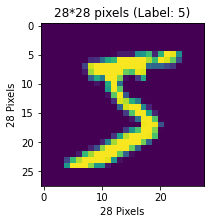

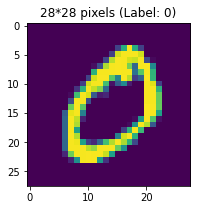

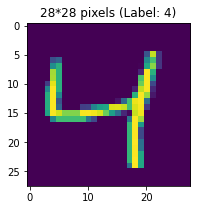

In [6]:
plt.xlabel ('28 Pixels')
plt.ylabel ('28 Pixels')
for i in range (3):
    plt.title ('28*28 pixels (Label: {})'.format (y_train [i]))
    plt.imshow (x_train [i].reshape (28, 28))
    plt.show ()

In [7]:
test_data = pd.read_csv ('D://Datasets//mnist_test.csv')
display (test_data.head (3))

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.shape

(10000, 785)

In [9]:
x_test = test_data.drop (['label'], axis=1).values
x_test.shape

(10000, 784)

In [10]:
y_test = test_data.label.values
y_test.shape

(10000,)

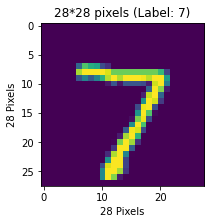

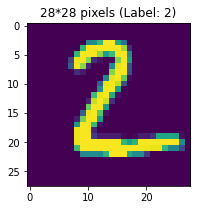

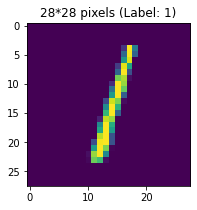

In [11]:
plt.xlabel ('28 Pixels')
plt.ylabel ('28 Pixels')
for i in range (3):
    plt.title ('28*28 pixels (Label: {})'.format (y_test [i]))
    plt.imshow (x_test [i].reshape (28, 28))
    plt.show ()

# ANN Model Building

In [12]:
model = Sequential (
    Dense (units=10, 
           input_shape=(784, ), 
           activation='softmax')
)

model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit (x_train,  y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 9.4085 - accuracy: 0.8417
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.1154 - accuracy: 0.8796
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7309 - accuracy: 0.8829
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5199 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 5.4699 - accuracy: 0.8857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2413 - accuracy: 0.8891
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3311 - accuracy: 0.8878
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2290 - accuracy: 0.8891
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2190 - accuracy: 0.8896
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 5.223

# Model Testing & Evaluation

In [14]:
y_pred = model.predict (x_test)
print (y_pred)

313/313 [==============================] - 1s 2ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.3123521e-21 ... 0.0000000e+00
  1.1000188e-34 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.0236965e-37]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [15]:
# Model based
model.evaluate (x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.8153 - accuracy: 0.8959


[5.815340995788574, 0.8959000110626221]

In [16]:
y_pred_new = []
for i in range (len (y_pred)):
    y_pred_new.append (np.argmax (y_pred [i]))
print (y_pred_new)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 8, 9, 7, 3, 4, 9, 6, 4, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2, 4, 4, 6, 3, 4, 4, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 3, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 2, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 4, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 4, 0, 5, 8, 8, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 8, 0, 1, 1, 1, 0, 3, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 4, 0, 3, 5, 7, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 7, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 3, 8, 7, 2, 6, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 2, 2, 0, 8, 8, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 2, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 3, 7, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

In [17]:
#SKLearn
print (f'Accuaracy: {accuracy_score (y_test, y_pred_new)*100}%')

Accuaracy: 89.59%


# Comparing true and predicted

In [18]:
compare_df = pd.DataFrame ({'Y_test': y_test, 'Y_pred': y_pred_new})

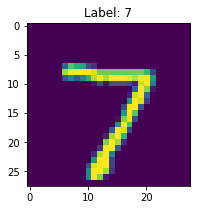

Prediction:  7


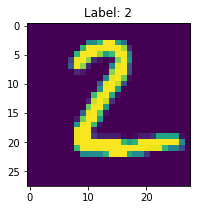

Prediction:  2


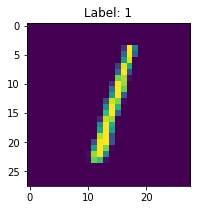

Prediction:  1


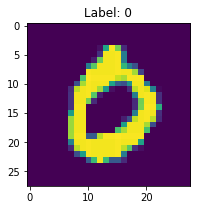

Prediction:  0


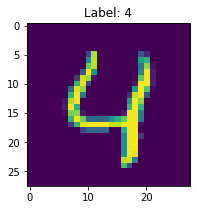

Prediction:  4


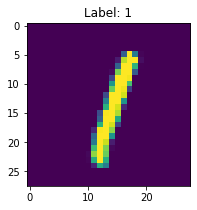

Prediction:  1


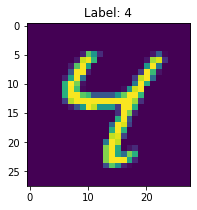

Prediction:  4


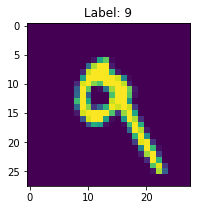

Prediction:  9


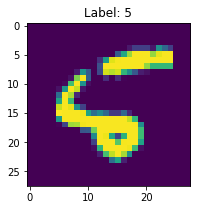

Prediction:  6


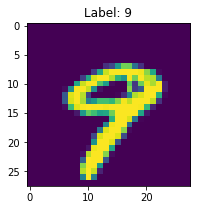

Prediction:  9


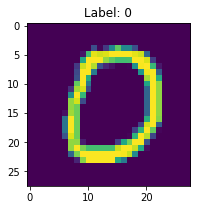

Prediction:  0


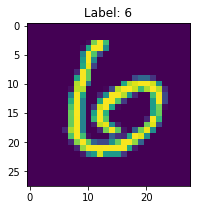

Prediction:  6


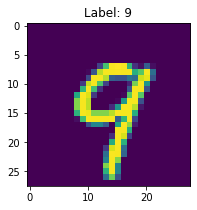

Prediction:  9


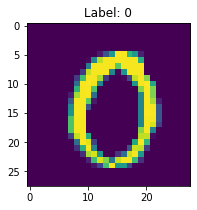

Prediction:  0


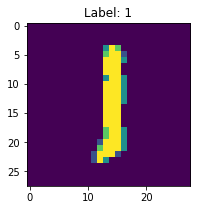

Prediction:  1


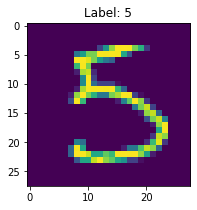

Prediction:  8


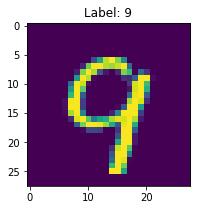

Prediction:  9


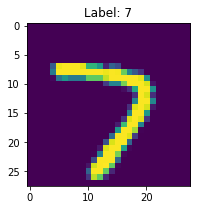

Prediction:  7


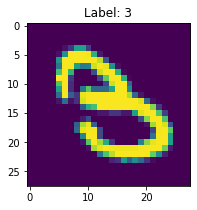

Prediction:  3


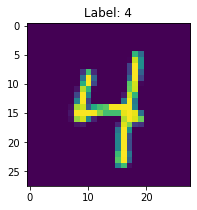

Prediction:  4


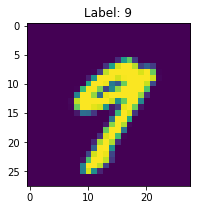

Prediction:  9


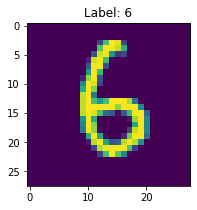

Prediction:  6


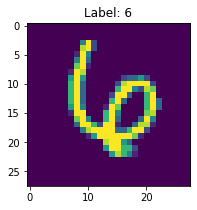

Prediction:  4


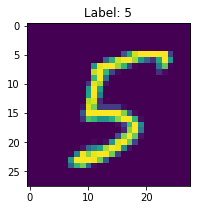

Prediction:  5


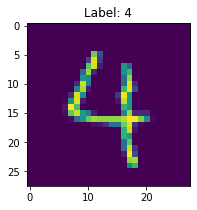

Prediction:  4


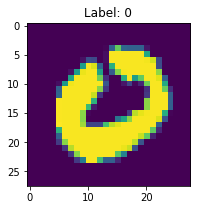

Prediction:  0


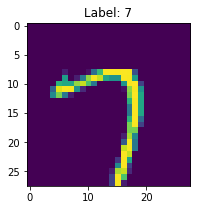

Prediction:  7


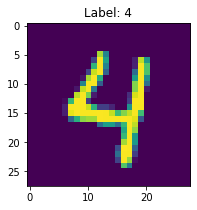

Prediction:  4


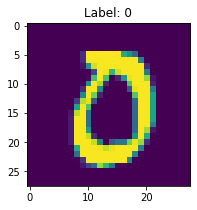

Prediction:  0


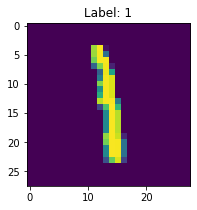

Prediction:  1


In [19]:
for i in range (30):
    plt.title ('Label: {}'.format (y_test [i]))
    plt.imshow (x_test [i].reshape (28, 28))
    plt.show ()
    print ('Prediction: ', y_pred_new [i])

In [20]:
display (compare_df.head (30))

,Y_test,Y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9
